In this notebook we investigate the vertexes needed to LFVZD in the MLRSM using the UFO model of [Roitgrund2016](https://www.sciencedirect.com/science/article/pii/S0010465515004476?via%3Dihub)

In [1]:
#import sys
#sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO')

In [2]:
from UFOexplorerSympy2 import UFOModelExplorer, ProjM, ProjP

In [3]:
ufo_directory ='C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix'
UFOModel = UFOModelExplorer(ufo_directory=ufo_directory)
UFOModel.load_model()


Loading particles from C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py...
Namespace keys after executing C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py: ['__builtins__', 'division', 'all_particles', 'Particle', 'Param', 'Prop', 'a', 'Z', 'W__plus__', 'W__minus__', 'g', 'W2__plus__', 'W2__minus__', 'Z2', 'ghG', 'ghG__tilde__', 'e__minus__', 'e__plus__', 'mu__minus__', 'mu__plus__', 'ta__minus__', 'ta__plus__', 'u', 'u__tilde__', 'c', 'c__tilde__', 't', 't__tilde__', 'd', 'd__tilde__', 's', 's__tilde__', 'b', 'b__tilde__', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'H', 'H01', 'H02', 'H03', 'G01', 'G02', 'GL__plus__', 'GL__minus__', 'GR__plus__', 'GR__minus__', 'HP1', 'HM1', 'HP2', 'HM2', 'HL__plus____plus__', 'HL__minus____minus__', 'HR__plus____plus__', 'HR__minus____minus__', 'A01', 'A02']
Namespace contents after executing C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO

In [4]:
UFOModel.summarize_model()


Model Summary:
Particles: 54
Parameters: 1377
Couplings: 1512
Lorentz Structures: 23
Vertices: 1638
Decays: 29


In [5]:
feynman_rules = UFOModel.list_feynman_rules(number_particles=3)

# H interactions

In [6]:
Vertices3withH = UFOModel.find_vertices_involving('H', number_particles=3)
print(Vertices3withH[0].couplings)
print(Vertices3withH[0].lorentz[0].structure)
print(Vertices3withH[0].nice_string())

{(0, 0): GC_414}
1
name 	: V_119
particles 	: [A01, A01, H]
color 	: ['1']
lorentz 	: [SSS1]
couplings 	: {(0, 0): GC_414}


In [7]:
display(Vertices3withH[0].particles,feynman_rules[Vertices3withH[0]])

[A01, A01, H]

2*I*(-k1**4*lambda1 + 4*k1**4*lambda2 - 2*k1**4*lambda3 - 2*k1**2*k2**2*lambda1 + 16*k1**2*k2**2*lambda2 - k2**4*lambda1 + 4*k2**4*lambda2 - 2*k2**4*lambda3)/vev**3

In [8]:
print(UFOModel.particles[2].charge)

1.0


In [9]:
charged_Splus = [ptc for ptc in UFOModel.particles if (ptc.charge >0 and ptc.spin==1)]
print(charged_Splus)

charged_Sminus = [ptc for ptc in UFOModel.particles if (ptc.charge <0 and ptc.spin==1)]
print(charged_Sminus)

[GL__plus__, GR__plus__, HP1, HP2, HL__plus____plus__, HR__plus____plus__]
[GL__minus__, GR__minus__, HM1, HM2, HL__minus____minus__, HR__minus____minus__]


In [10]:
charged_Vplus = [ptc for ptc in UFOModel.particles if (ptc.charge >0 and ptc.spin==3)]
print(charged_Vplus)

charged_Vminus = [ptc for ptc in UFOModel.particles if (ptc.charge <0 and ptc.spin==3)]
print(charged_Vminus)

[W__plus__, W2__plus__]
[W__minus__, W2__minus__]


In [11]:
charged_SVplus = charged_Splus + charged_Vminus
charged_SVminus = charged_Sminus + charged_Vplus

In [12]:
from itertools import chain
def flatten_list(lista):
    return list(chain.from_iterable(lista))

In [13]:
VerticesHXplusXminus = flatten_list(
    [
    UFOModel.find_vertices_involving(['H', X1.name, X2.name], number_particles=3)
    for X1 in charged_SVplus for X2 in charged_SVminus if UFOModel.find_vertices_involving(['H', X1.name, X2.name], number_particles=3)
]
)
print(VerticesHXplusXminus)

[V_121, V_415, V_379, V_136, V_416, V_319, V_436, V_381, V_333, V_394, V_137, V_438, V_396, V_124, V_337, V_341, V_1092, V_1004, V_1120, V_1025]


In [14]:
for v in VerticesHXplusXminus:
    print(v, ' -> ', v.particles)

V_121  ->  [GL__minus__, GL__plus__, H]
V_415  ->  [GL__plus__, GR__minus__, H]
V_379  ->  [GL__plus__, H, HM1]
V_136  ->  [GL__plus__, H, HM2]
V_416  ->  [GL__minus__, GR__plus__, H]
V_319  ->  [GR__minus__, GR__plus__, H]
V_436  ->  [GR__plus__, H, HM2]
V_381  ->  [GL__minus__, H, HP1]
V_333  ->  [H, HM1, HP1]
V_394  ->  [H, HP1, HM2]
V_137  ->  [GL__minus__, H, HP2]
V_438  ->  [GR__minus__, H, HP2]
V_396  ->  [H, HM1, HP2]
V_124  ->  [H, HM2, HP2]
V_337  ->  [H, HL__minus____minus__, HL__plus____plus__]
V_341  ->  [H, HR__minus____minus__, HR__plus____plus__]
V_1092  ->  [W__minus__, W__plus__, H]
V_1004  ->  [W__minus__, W2__plus__, H]
V_1120  ->  [W2__minus__, W__plus__, H]
V_1025  ->  [W2__minus__, W2__plus__, H]


In [15]:
neutrinos = [ptc for ptc in UFOModel.particles if ptc.charge==0 and ptc.spin==2]
neutrinos

[N1, N2, N3, N4, N5, N6]

In [16]:

VerticesHNiNj = flatten_list(
    [
    UFOModel.find_vertices_involving(['H', X1.name, X2.name], number_particles=3)
    for X1 in neutrinos for X2 in neutrinos if UFOModel.find_vertices_involving(['H', X1.name, X2.name], number_particles=3)
]
)
print(len(VerticesHNiNj),VerticesHNiNj)

66 [V_567, V_568, V_569, V_570, V_571, V_572, V_568, V_569, V_570, V_571, V_572, V_568, V_568, V_573, V_574, V_575, V_576, V_577, V_574, V_575, V_576, V_577, V_569, V_574, V_569, V_574, V_578, V_579, V_580, V_581, V_579, V_580, V_581, V_570, V_575, V_579, V_570, V_575, V_579, V_582, V_583, V_584, V_583, V_584, V_571, V_576, V_580, V_583, V_571, V_576, V_580, V_583, V_585, V_586, V_586, V_572, V_577, V_581, V_584, V_586, V_572, V_577, V_581, V_584, V_586, V_587]


In [17]:
sympy_parameters = UFOModel.classify_parameters()
print(sympy_parameters['internal'])

[ZERO, aEW, sw2, cw, gs, vev, MH02, MH03, MA02, yML1x1, yML2x2, yML3x3, yNL1x1, yNL2x2, yNL3x3, yNL4x4, yNL5x5, yNL6x6, yMU1x1, yMU2x2, yMU3x3, yDO1x1, yDO2x2, yDO3x3, CKML1x1, CKML1x2, CKML1x3, CKML2x1, CKML2x2, CKML2x3, CKML3x1, CKML3x2, CKML3x3, Wl1x1, Wl2x2, Wl3x3, WU1x1, WU2x2, WU3x3, WD1x1, WD2x2, WD3x3, KL1x1, KL1x2, KL1x3, KL2x1, KL2x2, KL2x3, KL3x1, KL3x2, KL3x3, KL4x1, KL4x2, KL4x3, KL5x1, KL5x2, KL5x3, KL6x1, KL6x2, KL6x3, KR1x1, KR1x2, KR1x3, KR2x1, KR2x2, KR2x3, KR3x1, KR3x2, KR3x3, KR4x1, KR4x2, KR4x3, KR5x1, KR5x2, KR5x3, KR6x1, KR6x2, KR6x3, CKMR1x1, CKMR1x2, CKMR1x3, CKMR2x1, CKMR2x2, CKMR2x3, CKMR3x1, CKMR3x2, CKMR3x3, sw, ee, k2, eps, sphi, sxi, g1, gw, cphi, cxi, MA01, MH, MH01, MHP1, MHP2, MHPPL, MHPPR, MW2, MZ2, I1a11, I1a12, I1a13, I1a21, I1a22, I1a23, I1a31, I1a32, I1a33, I10a11, I10a12, I10a13, I10a21, I10a22, I10a23, I10a31, I10a32, I10a33, I11a11, I11a12, I11a13, I11a21, I11a22, I11a23, I11a31, I11a32, I11a33, I12a11, I12a12, I12a13, I12a21, I12a22, I12a23, I

In [18]:
#from UFOexplorerSympy2 import preprocess_expression
#from sympy import sympify

In [19]:
#substitutions_internal = {}
#for param in sympy_parameters['internal']:
#    if hasattr(param, 'nature') and param.nature == 'internal' and hasattr(param, 'value'):
#        value = preprocess_expression(param.value)
#        if param.name=='vev':
#            value = value.replace('0.25','(1/4)')
#        try:
#            substitutions_internal[sympify(param.name)] = sympify(value)
#        except Exception as e:
#            print(f"Failed to sympify parameter {param.name} with value {param.value}: {e}")

#substitutions_internal

In [23]:
for v in VerticesHNiNj:
    print(v, ' -> ', v.particles)
    feynrule = feynman_rules[v].expand()
    CR, CL = feynrule.coeff(ProjP(2,1)).factor(), feynrule.coeff(ProjM(2,1)).factor()
    #print(CR, '\n', UFOModel.substitute_internal_parameters(CR).simplify())
    print(f'CL = {CL},\nCR = {CR}')
    # display(CR.subs(substitutions_internal))

V_567  ->  [N1, N1, H]
CL = -I*(I13a11 + I14a11)/vev,
CR = -I*(I15a11 + I16a11)/vev
V_568  ->  [N2, N1, H]
CL = -I*(I13a12 + I13a21 + I14a12 + I14a21)/(2*vev),
CR = -I*(I15a12 + I15a21 + I16a12 + I16a21)/(2*vev)
V_569  ->  [N3, N1, H]
CL = -I*(I13a13 + I13a31 + I14a13 + I14a31)/(2*vev),
CR = -I*(I15a13 + I15a31 + I16a13 + I16a31)/(2*vev)
V_570  ->  [N4, N1, H]
CL = -I*(I13a14 + I13a41 + I14a14 + I14a41)/(2*vev),
CR = -I*(I15a14 + I15a41 + I16a14 + I16a41)/(2*vev)
V_571  ->  [N5, N1, H]
CL = -I*(I13a15 + I13a51 + I14a15 + I14a51)/(2*vev),
CR = -I*(I15a15 + I15a51 + I16a15 + I16a51)/(2*vev)
V_572  ->  [N6, N1, H]
CL = -I*(I13a16 + I13a61 + I14a16 + I14a61)/(2*vev),
CR = -I*(I15a16 + I15a61 + I16a16 + I16a61)/(2*vev)
V_568  ->  [N2, N1, H]
CL = -I*(I13a12 + I13a21 + I14a12 + I14a21)/(2*vev),
CR = -I*(I15a12 + I15a21 + I16a12 + I16a21)/(2*vev)
V_569  ->  [N3, N1, H]
CL = -I*(I13a13 + I13a31 + I14a13 + I14a31)/(2*vev),
CR = -I*(I15a13 + I15a31 + I16a13 + I16a31)/(2*vev)
V_570  ->  [N4, N1, 

# Z interactions

## Vertices Z with charged Scalars and vectors

In [24]:
VerticesZXplusXminus = flatten_list(
    [
    UFOModel.find_vertices_involving(['Z', X1.name, X2.name], number_particles=3)
    for X1 in charged_SVplus for X2 in charged_SVminus if UFOModel.find_vertices_involving(['Z', X1.name, X2.name], number_particles=3)
]
)
print(VerticesZXplusXminus)

[V_1213, V_1214, V_1215, V_1216, V_1217, V_1218, V_1097, V_1007, V_1123, V_1030]


In [25]:
for v in VerticesZXplusXminus:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v].factor())


V_1213
[Z, GL__minus__, GL__plus__]  ->  -I*gw*(k1**2 + k2**2)*(P(1, 2) - P(1, 3))*(cphi*cw**2 - cphi*sw**2 - sphi*sqrt(1 - 2*sw**2))/(2*cw*vev**2)
V_1214
[Z, GR__minus__, GR__plus__]  ->  I*g1*sw*(cphi*sqrt(1 - 2*sw**2) - sphi)*(P(1, 2) - P(1, 3))/cw
V_1215
[Z, HM1, HP1]  ->  I*g1*sw*(cphi*sqrt(1 - 2*sw**2) - sphi)*(P(1, 2) - P(1, 3))/cw
V_1216
[Z, HM2, HP2]  ->  -I*gw*(k1**2 + k2**2)*(P(1, 2) - P(1, 3))*(cphi*cw**2 - cphi*sw**2 - sphi*sqrt(1 - 2*sw**2))/(2*cw*vev**2)
V_1217
[Z, HL__minus____minus__, HL__plus____plus__]  ->  I*(P(1, 2) - P(1, 3))*(-cphi*cw**2*gw + cphi*g1*sw*sqrt(1 - 2*sw**2) - g1*sphi*sw)/cw
V_1218
[Z, HR__minus____minus__, HR__plus____plus__]  ->  I*(P(1, 2) - P(1, 3))*(cphi*g1*sw*sqrt(1 - 2*sw**2) + cphi*gw*sw**2 - g1*sphi*sw + gw*sphi*sqrt(1 - 2*sw**2))/cw
V_1097
[W__minus__, W__plus__, Z]  ->  I*gw*(cphi*cw**2*cxi**2 - cphi*sw**2*sxi**2 - sphi*sxi**2*sqrt(1 - 2*sw**2))*(Metric(1, 2)*P(3, 1) - Metric(1, 2)*P(3, 2) - Metric(1, 3)*P(2, 1) + Metric(1, 3)*P(2, 3) + Me

## Vertexez Z with neutrinos Ni

In [26]:
VerticesZNiNj = flatten_list(
    [
    UFOModel.find_vertices_involving(['Z', X1.name, X2.name], number_particles=3)
    for X1 in neutrinos for X2 in neutrinos if UFOModel.find_vertices_involving(['Z', X1.name, X2.name], number_particles=3)
]
)
print(len(VerticesZNiNj),VerticesZNiNj)

66 [V_1579, V_1580, V_1581, V_1582, V_1583, V_1584, V_1580, V_1581, V_1582, V_1583, V_1584, V_1580, V_1580, V_1585, V_1586, V_1587, V_1588, V_1589, V_1586, V_1587, V_1588, V_1589, V_1581, V_1586, V_1581, V_1586, V_1590, V_1591, V_1592, V_1593, V_1591, V_1592, V_1593, V_1582, V_1587, V_1591, V_1582, V_1587, V_1591, V_1594, V_1595, V_1596, V_1595, V_1596, V_1583, V_1588, V_1592, V_1595, V_1583, V_1588, V_1592, V_1595, V_1597, V_1598, V_1598, V_1584, V_1589, V_1593, V_1596, V_1598, V_1584, V_1589, V_1593, V_1596, V_1598, V_1599]


In [27]:
for v in VerticesHNiNj:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v].factor())

V_567
[N1, N1, H]  ->  -I*(I13a11*ProjM(2, 1) + I14a11*ProjM(2, 1) + I15a11*ProjP(2, 1) + I16a11*ProjP(2, 1))/vev
V_568
[N2, N1, H]  ->  -I*(I13a12*ProjM(2, 1) + I13a21*ProjM(2, 1) + I14a12*ProjM(2, 1) + I14a21*ProjM(2, 1) + I15a12*ProjP(2, 1) + I15a21*ProjP(2, 1) + I16a12*ProjP(2, 1) + I16a21*ProjP(2, 1))/(2*vev)
V_569
[N3, N1, H]  ->  -I*(I13a13*ProjM(2, 1) + I13a31*ProjM(2, 1) + I14a13*ProjM(2, 1) + I14a31*ProjM(2, 1) + I15a13*ProjP(2, 1) + I15a31*ProjP(2, 1) + I16a13*ProjP(2, 1) + I16a31*ProjP(2, 1))/(2*vev)
V_570
[N4, N1, H]  ->  -I*(I13a14*ProjM(2, 1) + I13a41*ProjM(2, 1) + I14a14*ProjM(2, 1) + I14a41*ProjM(2, 1) + I15a14*ProjP(2, 1) + I15a41*ProjP(2, 1) + I16a14*ProjP(2, 1) + I16a41*ProjP(2, 1))/(2*vev)
V_571
[N5, N1, H]  ->  -I*(I13a15*ProjM(2, 1) + I13a51*ProjM(2, 1) + I14a15*ProjM(2, 1) + I14a51*ProjM(2, 1) + I15a15*ProjP(2, 1) + I15a51*ProjP(2, 1) + I16a15*ProjP(2, 1) + I16a51*ProjP(2, 1))/(2*vev)
V_572
[N6, N1, H]  ->  -I*(I13a16*ProjM(2, 1) + I13a61*ProjM(2, 1) + I14a16*Pr

# Interactions with Charged scalars

## Interactions with $H_{1,2}^+$

### Vertexes $H_{1,2}^+$ FF

In [28]:
leptons = [
    ptc for ptc in UFOModel.particles if ptc.spin==2 and ptc.color==1
]
leptons

[e__minus__,
 e__plus__,
 mu__minus__,
 mu__plus__,
 ta__minus__,
 ta__plus__,
 N1,
 N2,
 N3,
 N4,
 N5,
 N6]

In [30]:
VerticesH1plusFF1 = flatten_list(
    [
    UFOModel.find_vertices_involving(['HP1', X1.name, X2.name], number_particles=3)
    for X1 in leptons for X2 in leptons
    if (UFOModel.find_vertices_involving(['HP1', X1.name, X2.name], number_particles=3) )
]
)
VerticesH1plusFF2 = []
for v in VerticesH1plusFF1:
    if v not in VerticesH1plusFF2:
        VerticesH1plusFF2.append(v)

VerticesH2plusFF1 = flatten_list(
    [
    UFOModel.find_vertices_involving(['HP2', X1.name, X2.name], number_particles=3)
    for X1 in leptons for X2 in leptons
    if (UFOModel.find_vertices_involving(['HP2', X1.name, X2.name], number_particles=3) )
]
)
VerticesH2plusFF2 = []
for v in VerticesH2plusFF1:
    if v not in VerticesH2plusFF2:
        VerticesH2plusFF2.append(v)

In [31]:
for v in VerticesH1plusFF2:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v])

for v in VerticesH2plusFF2:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v])

V_834
[N1, e__minus__, HP1]  ->  I*(I43a11 + I44a11)*ProjP(2, 1)/(2*vR)
V_835
[N2, e__minus__, HP1]  ->  I*(I43a21 + I44a21)*ProjP(2, 1)/(2*vR)
V_836
[N3, e__minus__, HP1]  ->  I*(I43a31 + I44a31)*ProjP(2, 1)/(2*vR)
V_837
[N4, e__minus__, HP1]  ->  I*(I43a41 + I44a41)*ProjP(2, 1)/(2*vR)
V_838
[N5, e__minus__, HP1]  ->  I*(I43a51 + I44a51)*ProjP(2, 1)/(2*vR)
V_839
[N6, e__minus__, HP1]  ->  I*(I43a61 + I44a61)*ProjP(2, 1)/(2*vR)
V_840
[N1, mu__minus__, HP1]  ->  I*(I43a12 + I44a12)*ProjP(2, 1)/(2*vR)
V_841
[N2, mu__minus__, HP1]  ->  I*(I43a22 + I44a22)*ProjP(2, 1)/(2*vR)
V_842
[N3, mu__minus__, HP1]  ->  I*(I43a32 + I44a32)*ProjP(2, 1)/(2*vR)
V_843
[N4, mu__minus__, HP1]  ->  I*(I43a42 + I44a42)*ProjP(2, 1)/(2*vR)
V_844
[N5, mu__minus__, HP1]  ->  I*(I43a52 + I44a52)*ProjP(2, 1)/(2*vR)
V_845
[N6, mu__minus__, HP1]  ->  I*(I43a62 + I44a62)*ProjP(2, 1)/(2*vR)
V_846
[N1, ta__minus__, HP1]  ->  I*(I43a13 + I44a13)*ProjP(2, 1)/(2*vR)
V_847
[N2, ta__minus__, HP1]  ->  I*(I43a23 + I44a23)*Pro

In [32]:
VerticesH1minusFF1 = flatten_list(
    [
    UFOModel.find_vertices_involving(['HM1', X1.name, X2.name], number_particles=3)
    for X1 in leptons for X2 in leptons
    if (UFOModel.find_vertices_involving(['HM1', X1.name, X2.name], number_particles=3) )
]
)
VerticesH1minusFF2 = []
for v in VerticesH1minusFF1:
    if v not in VerticesH1minusFF2:
        VerticesH1minusFF2.append(v)

VerticesH2minusFF1 = flatten_list(
    [
    UFOModel.find_vertices_involving(['HM2', X1.name, X2.name], number_particles=3)
    for X1 in leptons for X2 in leptons
    if (UFOModel.find_vertices_involving(['HM2', X1.name, X2.name], number_particles=3) )
]
)
VerticesH2minusFF2 = []
for v in VerticesH2minusFF1:
    if v not in VerticesH2minusFF2:
        VerticesH2minusFF2.append(v)

In [33]:
for v in VerticesH1minusFF2:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v])

for v in VerticesH2minusFF2:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v])

V_1173
[e__plus__, N1, HM1]  ->  I*(I51a11 + I52a11)*ProjM(2, 1)/(2*vR)
V_1176
[e__plus__, N2, HM1]  ->  I*(I51a21 + I52a21)*ProjM(2, 1)/(2*vR)
V_1179
[e__plus__, N3, HM1]  ->  I*(I51a31 + I52a31)*ProjM(2, 1)/(2*vR)
V_1182
[e__plus__, N4, HM1]  ->  I*(I51a41 + I52a41)*ProjM(2, 1)/(2*vR)
V_1185
[e__plus__, N5, HM1]  ->  I*(I51a51 + I52a51)*ProjM(2, 1)/(2*vR)
V_1188
[e__plus__, N6, HM1]  ->  I*(I51a61 + I52a61)*ProjM(2, 1)/(2*vR)
V_1174
[mu__plus__, N1, HM1]  ->  I*(I51a12 + I52a12)*ProjM(2, 1)/(2*vR)
V_1177
[mu__plus__, N2, HM1]  ->  I*(I51a22 + I52a22)*ProjM(2, 1)/(2*vR)
V_1180
[mu__plus__, N3, HM1]  ->  I*(I51a32 + I52a32)*ProjM(2, 1)/(2*vR)
V_1183
[mu__plus__, N4, HM1]  ->  I*(I51a42 + I52a42)*ProjM(2, 1)/(2*vR)
V_1186
[mu__plus__, N5, HM1]  ->  I*(I51a52 + I52a52)*ProjM(2, 1)/(2*vR)
V_1189
[mu__plus__, N6, HM1]  ->  I*(I51a62 + I52a62)*ProjM(2, 1)/(2*vR)
V_1175
[ta__plus__, N1, HM1]  ->  I*(I51a13 + I52a13)*ProjM(2, 1)/(2*vR)
V_1178
[ta__plus__, N2, HM1]  ->  I*(I51a23 + I52a23)*Pro

## Vertexes $X^\pm_{L,R}FF$ with $X=S,V$

In [34]:
print(UFOModel.particles)

[a, Z, W__plus__, W__minus__, g, W2__plus__, W2__minus__, Z2, ghG, ghG__tilde__, e__minus__, e__plus__, mu__minus__, mu__plus__, ta__minus__, ta__plus__, u, u__tilde__, c, c__tilde__, t, t__tilde__, d, d__tilde__, s, s__tilde__, b, b__tilde__, N1, N2, N3, N4, N5, N6, H, H01, H02, H03, G01, G02, GL__plus__, GL__minus__, GR__plus__, GR__minus__, HP1, HM1, HP2, HM2, HL__plus____plus__, HL__minus____minus__, HR__plus____plus__, HR__minus____minus__, A01, A02]


In [35]:
VerticesGLplus = UFOModel.find_vertices_involving(['GL__minus__'])
print(VerticesGLplus)

[]


In [36]:
leptons[0].charge != -leptons[1].charge

False

In [37]:
VerticesXplusminusFF1 = flatten_list(
    [
    UFOModel.find_vertices_involving([ X1.name, X2.name, X3.name], number_particles=3)
    for X1 in leptons for X2 in leptons for X3 in charged_SVplus
    if (UFOModel.find_vertices_involving([ X1.name, X2.name], number_particles=3) and X1 != X2)
]
)
VerticesXplusminusFF2 = []
for v in VerticesXplusminusFF1:
    if v not in VerticesXplusminusFF2:
        VerticesXplusminusFF2.append(v)

In [38]:
for v in VerticesXplusminusFF2:
    print(v)
    print(v.particles, ' -> ', feynman_rules[v])

V_853
[mu__minus__, e__minus__, HL__plus____plus__]  ->  sqrt(2)*I*(I45a12 + I45a21 + I46a12 + I46a21)*ProjP(2, 1)/(4*vR)
V_787
[mu__minus__, e__minus__, HR__plus____plus__]  ->  sqrt(2)*I*(I37a12 + I37a21 + I38a12 + I38a21)*ProjM(2, 1)/(4*vR)
V_854
[ta__minus__, e__minus__, HL__plus____plus__]  ->  sqrt(2)*I*(I45a13 + I45a31 + I46a13 + I46a31)*ProjP(2, 1)/(4*vR)
V_788
[ta__minus__, e__minus__, HR__plus____plus__]  ->  sqrt(2)*I*(I37a13 + I37a31 + I38a13 + I38a31)*ProjM(2, 1)/(4*vR)
V_648
[N1, e__minus__, GL__plus__]  ->  sqrt(2)*I*(I21a11*ProjM(2, 1) - I24a11*ProjP(2, 1))/vev
V_768
[N1, e__minus__, GR__plus__]  ->  I*(I35a11 + I36a11)*ProjM(2, 1)/(2*vR)
V_834
[N1, e__minus__, HP1]  ->  I*(I43a11 + I44a11)*ProjP(2, 1)/(2*vR)
V_630
[N1, e__minus__, HP2]  ->  sqrt(2)*I*((I23a11*k1**2 + I23a11*k2**2 - 2*I24a11*k1*k2)*ProjP(2, 1) - (-2*I21a11*k1*k2 + I22a11*k1**2 + I22a11*k2**2)*ProjM(2, 1))/(vev*(k1 - k2)*(k1 + k2))
V_649
[N2, e__minus__, GL__plus__]  ->  sqrt(2)*I*(I21a21*ProjM(2, 1) - I

# Calculating the lepton Flavor violating Higgs and Z decays

We start considering the LFVHD. As we know in the Manifest Left-Right Symmetric model,  we have 4 neutral scalars $H_r^0$ with $r=0,1,2,3$, and $H_0^0 = h^{\text{SM}}$, there are two singly charged Higgs $H_{1,2}^\pm$ y two doubly charged Higgs $H_{L,R}^{\pm \pm}$, all this scalars represents 12 degrees of freedom of the model. Also we have two neutral vector bosons $Z$ and $Z_2$, also, we have two charged vector bosons $W^\pm$ and $W_2^\pm$.Adittionally, we have to neutral $G_{1,2}^0$ and two charged $G_{L,R}^\pm$ goldstone bosons, associated to the corresponding vector neutral and charged bosons.

With our UFOModelExplorer class we are able to explore the feynman rules of the MLRSM UFO files and classify them as we did it.

In [39]:
particles_htomutau_names = ['H', 'mu-', 'ta+']
particles_htomutau = [
    ptc for ptc in UFOModel.particles if ptc.name in particles_htomutau_names
]
particles_htomutau

[mu__minus__, ta__plus__, H]

In [40]:
mubar, tau, H = particles_htomutau
mubar, tau, H

(mu__minus__, ta__plus__, H)

In [41]:
from sympy import symbols, init_printing, sympify
init_printing()

In [42]:
Mmu = sympify(str(mubar.mass))
Mtau = sympify(str(tau.mass))
Mh = sympify(str(H.mass))
Mh, Mmu, Mtau

In [43]:
MN = {N:sympify(str(N.mass)) for N in neutrinos}
MN

{N1: MN1, N2: MN2, N3: MN3, N4: MN4, N5: MN5, N6: MN6}

In [44]:
chargedHPi = UFOModel.find_particles(['HP1', 'HP2'])
chargedHMi = UFOModel.find_particles(['HM1', 'HM2'])
chargedHPi, chargedHMi

([HP1, HP2], [HM1, HM2])

In [45]:
HP1, HP2 = chargedHPi
HM1, HM2 = chargedHMi

MHP1 = sympify(str(HP1.mass))
MHP2 = sympify(str(HP2.mass))

MHP1, MHP2

In [46]:
HM1.mass == HP1.mass

True

In [47]:
#ks = UFOModel.sympify_parameters(['k1','k2'])
ks = symbols('k1, k2') #UFOModel.sympify_parameters(['k1','k2'])
ks

In [48]:
UFOModel.sympify_parameters(['k2'])

{'k2': sqrt(-k1**2 + vev**2)}

In [49]:
UFOModel.sympify_parameters(['vev'])

{'vev': 2**(3/4)/(2*sqrt(Gf))}

In [472]:
def extract_chiral_coefficients_optimized(vertex, ufo_model):
    """
    Extract the coefficients of ProjP and ProjM from a given Feynman rule for a vertex.
    :param vertex: Vertex object containing particles and couplings.
    :param ufo_model: Instance of the UFOModelExplorer.
    :return: Dictionary with coefficients of ProjP and ProjM indexed by specific indices.
    """

    # Get the Feynman rule
    feynman_rule = ufo_model.generate_symbolic_feynman_rule(vertex)

    # Ensure the vertex has a Feynman rule
    #if bool(feynman_rule):
    #    raise ValueError(f"No Feynman rule found for the vertex: {vertex}")

    # Initialize dictionary to store coefficients
    coefficients = {}

    # Split the Feynman rule into terms
    terms = feynman_rule.expand().as_ordered_terms()

    # Loop through terms to identify ProjP and ProjM terms
    for term in terms:
        # Find all instances of ProjP in the term
        proj_p_instances = term.atoms(ProjP)
        for proj in proj_p_instances:
            indices = proj.args  # Extract indices from ProjP(i, j)
            coefficient = term.coeff(proj)
            coefficients[(indices[0], indices[1], 'ProjP')] = coefficient

        # Find all instances of ProjM in the term
        proj_m_instances = term.atoms(ProjM)
        for proj in proj_m_instances:
            indices = proj.args  # Extract indices from ProjM(i, j)
            coefficient = term.coeff(proj)
            coefficients[(indices[0], indices[1], 'ProjM')] = coefficient

    return coefficients

In [473]:
for v in UFOModel.find_vertices_involving(['N1', 'GL+']):
    print('vertex: ', v)
    print('particles: ', v.particles)
    print('Feynman rule: ', UFOModel.generate_symbolic_feynman_rule(v))
    print(bool(UFOModel.generate_symbolic_feynman_rule(v)))
    print(
        'Chiral coefficients:\n\t',
        extract_chiral_coefficients_optimized(v, ufo_model=UFOModel)# feynman_rules=feynman_rules)
    )


vertex:  V_648
particles:  [N1, e__minus__, GL__plus__]
Feynman rule:  sqrt(2)*I*(I21a11*ProjM(2, 1) - I24a11*ProjP(2, 1))/vev
True
Chiral coefficients:
	 {(2, 1, 'ProjM'): sqrt(2)*I*I21a11/vev, (2, 1, 'ProjP'): -sqrt(2)*I*I24a11/vev}
vertex:  V_654
particles:  [N1, mu__minus__, GL__plus__]
Feynman rule:  sqrt(2)*I*(I21a12*ProjM(2, 1) - I24a12*ProjP(2, 1))/vev
True
Chiral coefficients:
	 {(2, 1, 'ProjM'): sqrt(2)*I*I21a12/vev, (2, 1, 'ProjP'): -sqrt(2)*I*I24a12/vev}
vertex:  V_660
particles:  [N1, ta__minus__, GL__plus__]
Feynman rule:  sqrt(2)*I*(I21a13*ProjM(2, 1) - I24a13*ProjP(2, 1))/vev
True
Chiral coefficients:
	 {(2, 1, 'ProjM'): sqrt(2)*I*I21a13/vev, (2, 1, 'ProjP'): -sqrt(2)*I*I24a13/vev}


In [474]:
def extract_chiral_coefficients_vertexlfv(vertex, ufo_model):
    """
    Extract the chiral coefficients ProjP and ProjM from the Feynman rule for a given vertex.
    :param vertex: The vertex object containing the particles and couplings.
    :param ufo_model: Instance of the UFOModelExplorer.
    :return: A dictionary with keys 'ProjP' and 'ProjM' mapping to their respective coefficients.
    """
    # Initialize coefficients
    XR = None
    XL = None

    # Extract chiral coefficients
    coeff_dict = extract_chiral_coefficients_optimized(vertex, ufo_model=ufo_model)

    # Process the coefficients
    for key, value in coeff_dict.items():
        #print(f"Key: {key}, Coefficient: {value}")
        if key[2] == 'ProjM':
            XL = value
        elif key[2] == 'ProjP':
            XR = value
        else:
            raise ValueError(f"Unexpected projection operator: {key[2]}")

    # Check if coefficients were found
    if XR is None:
        print(f"Warning: XR (ProjP coefficient) not found in the Feynman rule of vertex {vertex} with paticles {vertex.particles}.")
        XR = 0
    if XL is None:
        print(f"Warning: XL (ProjM coefficient) not found in the Feynman rule of vertex {vertex} with paticles {vertex.particles}.")
        XL = 0

    # Return the coefficients in a dictionary
    return {'ProjP': XR, 'ProjM': XL}

In [475]:
import sys
sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/LFVXD')


In [476]:

from LFVXD import Hdecay_diagrams as D
from LFVXD import vertexes as v_lfvxd

neutrinos = [ptc for ptc in UFOModel.particles if ptc.charge==0 and ptc.spin==2]

N1, N2, N3, N4, N5, N6 = neutrinos

MN = {N:sympify(str(N.mass)) for N in neutrinos}

vertexH_HP1_HM1 = UFOModel.find_vertices_involving(
                ['H', 'HP1', 'HM1'], number_particles=3
            )[0]

coeff_H_HP1_HM1 = feynman_rules[vertexH_HP1_HM1].factor()

vertexHM1_taplus_N1 = UFOModel.find_vertices_involving(
    ['HM1', tau.name, N1.name], number_particles=3
)[0]  # Get the first vertex involving HM1, tau+, and N1

chiral_coeff_HM1_taplus_N1 = extract_chiral_coefficients_vertexlfv(vertexHM1_taplus_N1, ufo_model=UFOModel)

vertexHP1_muminus_N1 = UFOModel.find_vertices_involving(
    ['HP1', mubar.name, N1.name], number_particles=3
)[0]  # Get the first vertex involving HM1, tau+, and N1

chiral_coeff_HP1_muminus_N1 = extract_chiral_coefficients_vertexlfv(vertexHP1_muminus_N1, ufo_model=UFOModel)

triangleH_HP1_HM1 = D.TriangleFSS(
    v_lfvxd.VertexSSS(coeff_H_HP1_HM1),
    v_lfvxd.VertexSFF(
        cR=chiral_coeff_HM1_taplus_N1['ProjP'],
        cL=chiral_coeff_HM1_taplus_N1['ProjM']
    ),
    v_lfvxd.VertexSFF(
        cR=chiral_coeff_HP1_muminus_N1['ProjP'],
        cL=chiral_coeff_HP1_muminus_N1['ProjM']
    ),
    [Mh, Mmu, Mtau, MN[N1], MHP1, MHP1]
)

In [477]:
vertexGLplus_taminus_N1 = UFOModel.find_vertices_involving(
    ['GL+', 'ta-', N1.name], number_particles=3
)[0]

vertexGLminus_muplus_N1 = UFOModel.find_vertices_involving(
    ['GL-', 'mu+', N1.name], number_particles=3
)[0]

vertexGLplus_taminus_N1, vertexGLminus_muplus_N1

(V_660, V_667)

In [506]:
def check_charge_conservation(vertex_particles, ufo_model, charge_relation):
    """
    General function to check charge conservation for a vertex.
    :param vertex_particles: List of particle names in the vertex.
    :param ufo_model: Instance of the UFOModelExplorer.
    :param charge_relation: Function defining the expected charge relationship.
    :raises ValueError: If charge conservation is violated.
    """
    charges = [p.charge for p in ufo_model.find_particles(vertex_particles)]
    if len(charges) != len(vertex_particles):
        raise ValueError(f"Error finding charges for particles: {vertex_particles}.")
    if not charge_relation(charges):
        raise ValueError(
            f"Charge conservation violated for particles {vertex_particles}. "
            f"Charges: {charges}. Relation failed: {charge_relation.__doc__ or 'unspecified'}"
        )


In [507]:
def construct_triangle_diagram_FSS(loop_fermion: str, scalar1: str, scalar2: str,
                                    external_scalars: list[str], external_fermions: list[str],
                                    ufo_model: UFOModelExplorer, mass_dict: dict = None):
    """
    Construct a triangle diagram FSS for Higgs decay with charge conservation checks.
    """
    from LFVXD import Hdecay_diagrams as D
    from LFVXD import vertexes as v_lfvxd

    # Calculate mass_dict if not provided
    if mass_dict is None:
        mass_dict = {p.name: sympify(str(p.mass)) for p in ufo_model.particles}

    # Debug: Log particle names
    print(f"External scalar: {external_scalars[0]}")
    print(f"External fermions: {external_fermions}")
    print(f"Loop fermion: {loop_fermion}")
    print(f"Scalars in loop: {scalar1}, {scalar2}")

    # Check charge conservation for Vertex 1: Q(S_1) + Q(S_2) = Q(H_r)
    check_charge_conservation(
        [scalar1, scalar2, external_scalars[0]],
        ufo_model=ufo_model,
        charge_relation=lambda Q: Q[0] + Q[1] == Q[2],
    )

    # Check charge conservation for Vertex 2: Q(F) = Q(S_1) + Q(l_a^+)
    check_charge_conservation(
        [loop_fermion, scalar1, external_fermions[0]],
        ufo_model=ufo_model,
        charge_relation=lambda Q: Q[0] == Q[1] + Q[2],
    )

    # Check charge conservation for Vertex 3: Q(F) = Q(S_2) + Q(l_b^-)
    check_charge_conservation(
        [loop_fermion, scalar2, external_fermions[1]],
        ufo_model=ufo_model,
        charge_relation=lambda Q: Q[0] == Q[1] + Q[2],
    )

    # Retrieve vertices using ufo_model
    vertex_scalar_scalar_scalar = ufo_model.find_vertices_involving(
        [external_scalars[0], scalar1, scalar2], number_particles=3
    )
    if not vertex_scalar_scalar_scalar:
        raise ValueError(f"No vertex found for particles: {external_scalars[0]}, {scalar1}, {scalar2}")
    vertex_scalar_scalar_scalar = vertex_scalar_scalar_scalar[0]

    vertex_scalar_fermion_a = ufo_model.find_vertices_involving(
        [scalar1, loop_fermion, external_fermions[0]], number_particles=3
    )
    if not vertex_scalar_fermion_a:
        raise ValueError(f"No vertex found for particles: {scalar1}, {loop_fermion}, {external_fermions[0]}")
    vertex_scalar_fermion_a = vertex_scalar_fermion_a[0]

    vertex_scalar_fermion_b = ufo_model.find_vertices_involving(
        [scalar2, loop_fermion, external_fermions[1]], number_particles=3
    )
    if not vertex_scalar_fermion_b:
        raise ValueError(f"No vertex found for particles: {scalar2}, {loop_fermion}, {external_fermions[1]}")
    vertex_scalar_fermion_b = vertex_scalar_fermion_b[0]

    # Retrieve coefficients
    coeff_scalar_scalar_scalar = ufo_model.generate_symbolic_feynman_rule(vertex_scalar_scalar_scalar).factor()
    chiral_coeff_scalar_fermion_a = extract_chiral_coefficients_vertexlfv(
        vertex_scalar_fermion_a, ufo_model=ufo_model
    )
    chiral_coeff_scalar_fermion_b = extract_chiral_coefficients_vertexlfv(
        vertex_scalar_fermion_b, ufo_model=ufo_model
    )

    # Masses
    M_loop_fermion = mass_dict.get(loop_fermion, 0)
    M_scalar1 = mass_dict.get(scalar1, 0)
    M_scalar2 = mass_dict.get(scalar2, 0)
    M_ext_scalar = mass_dict.get(external_scalars[0], 0)
    M_ext_fermion_a = mass_dict.get(external_fermions[0], 0)
    M_ext_fermion_b = mass_dict.get(external_fermions[1], 0)

    # Build diagram
    return D.TriangleFSS(
        v_lfvxd.VertexSSS(coeff_scalar_scalar_scalar),
        v_lfvxd.VertexSFF(
            cR=chiral_coeff_scalar_fermion_a['ProjP'],
            cL=chiral_coeff_scalar_fermion_a['ProjM']
        ),
        v_lfvxd.VertexSFF(
            cR=chiral_coeff_scalar_fermion_b['ProjP'],
            cL=chiral_coeff_scalar_fermion_b['ProjM']
        ),
        [M_ext_scalar, M_ext_fermion_a, M_ext_fermion_b, M_loop_fermion, M_scalar1, M_scalar2]
    )


In [508]:
triangle_fss = construct_triangle_diagram_FSS(
    loop_fermion='N1',
    scalar1='HP1',
    scalar2='HM1',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fss)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalars in loop: HP1, HM1
TriangleFSS(VertexSSS(-I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)), VertexSFF(I*I44a12/(2*vR),0), {self.v3!r}, {self.masas!r})


In [481]:
charged_SVplus_names = [S.name for S in UFOModel.particles if S.spin == 1 and S.charge==1]
charged_SVplus_names.sort()
charged_SVminus_names = [S.name for S in UFOModel.particles if S.spin == 1 and S.charge==-1]
charged_SVminus_names.sort()

#print(charged_SVplus_names, charged_SVminus_names)

diagrams_fss = {}
nu = 'N1'
for Splus in charged_SVplus_names:
    for Sminus in charged_SVminus_names:
        print('*'*100)
        try:
            triangle_fss = construct_triangle_diagram_FSS(
                loop_fermion=nu,
                scalar1=Splus,
                scalar2=Sminus,
                external_scalars=['H'],
                external_fermions=['mu-', 'ta+'],
                ufo_model=UFOModel
            )
            diagrams_fss[(nu, Splus, Sminus)] = triangle_fss
        except:
            print(f'No diagram for Splus = {Splus} and Sminus = {Sminus}')
            diagrams_fss[(nu, Splus, Sminus)] = 0
        print(triangle_fss)


****************************************************************************************************
External scalar: H
External fermions: mu-, ta+
Loop fermion: N1
Scalars in loop: GL+, GL-
TriangleFSS(VertexSSS(-2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r})
****************************************************************************************************
External scalar: H
External fermions: mu-, ta+
Loop fermion: N1
Scalars in loop: GL+, GR-
TriangleFSS(VertexSSS(-sqrt(2)*I*alpha3*vR*(k1 - k2)*(k1 + k2)/(4*vev**2)), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r})
****************************************************************************************************
External scalar: H
External fermions: mu-, ta+
Loop fermion: N1
Scalars in loop: GL+, HM1
T

In [482]:
diagrams_fss

{('N1',
  'GL+',
  'GL-'): TriangleFSS(VertexSSS(-2*I*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/vev**3), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r}),
 ('N1',
  'GL+',
  'GR-'): TriangleFSS(VertexSSS(-sqrt(2)*I*alpha3*vR*(k1 - k2)*(k1 + k2)/(4*vev**2)), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r}),
 ('N1',
  'GL+',
  'HM1'): TriangleFSS(VertexSSS(-sqrt(2)*I*alpha3*vL*(k1 - k2)*(k1 + k2)/(4*vev**2)), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r}),
 ('N1',
  'GL+',
  'HM2'): TriangleFSS(VertexSSS(2*I*(k1 - k2)*(k1 + k2)*(k1**2*lambda4 + 4*k1*k2*lambda2 + 2*k1*k2*lambda3 + k2**2*lambda4)/vev**3), VertexSFF(-sqrt(2)*I*I24a12/vev,sqrt(2)*I*I21a12/vev), {self.v3!r}, {self.masas!r}),
 ('N1',
  'GR+',
  'GL-'): TriangleFSS(VertexSSS(-sqrt(2)*I*alpha3*vR*(k1 - k2)*(k1 + k2)/(4*ve

In [484]:
diagrams_fss_formfactors = {}
for particles, diagram in diagrams_fss.items():
    print(f'Particles in the loop: {particles}')
    try:
        AL_fss = diagram.AL().factor()
        print(f"AL{particles} = {AL_fss}")
        AR_fss = diagram.AR().factor()
        print(f"AR{particles} = {AR_fss}")
        diagrams_fss_formfactors[particles] = {'Left':AL_fss, 'Right':AR_fss}
    except:
        print(f'No form factors for {particles}')
        diagrams_fss_formfactors[particles] = {'Left':AL_fss, 'Right':AR_fss}

Particles in the loop: ('N1', 'GL+', 'GL-')
AL('N1', 'GL+', 'GL-') = -(I21a12*I25a13*MN1*C0(MH, Mmu, Mta, MN1, MW, MW) - I21a12*I26a13*Mmu*C1(MH, Mmu, Mta, MN1, MW, MW) + I24a12*I25a13*Mta*C2(MH, Mmu, Mta, MN1, MW, MW))*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/(4*pi**2*vev**5)
AR('N1', 'GL+', 'GL-') = -(I21a12*I26a13*Mta*C2(MH, Mmu, Mta, MN1, MW, MW) - I24a12*I25a13*Mmu*C1(MH, Mmu, Mta, MN1, MW, MW) + I24a12*I26a13*MN1*C0(MH, Mmu, Mta, MN1, MW, MW))*(k1**4*lambda1 + 4*k1**3*k2*lambda4 + 2*k1**2*k2**2*lambda1 + 8*k1**2*k2**2*lambda2 + 4*k1**2*k2**2*lambda3 + 4*k1*k2**3*lambda4 + k2**4*lambda1)/(4*pi**2*vev**5)
Particles in the loop: ('N1', 'GL+', 'GR-')
AL('N1', 'GL+', 'GR-') = I21a12*I48a13*Mmu*alpha3*(k1 - k2)*(k1 + k2)*C1(MH, Mmu, Mta, MN1, MW, MW2)/(64*pi**2*vev**3)
AR('N1', 'GL+', 'GR-') = -I48a13*alpha3*(k1 - k2)*(k1 + k2)*(I21a12*Mta*C2(MH, Mmu, Mta, MN1, MW, MW2) + I24a12*MN1

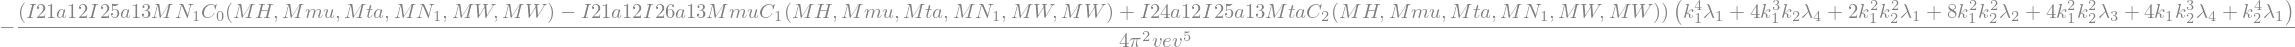

In [485]:
diagrams_fss_formfactors[('N1','GL+', 'GL-')]['Left']

In [240]:
for v in UFOModel.find_vertices_involving(
    ['GL+', N1.name], number_particles=3
):
    print(v.particles)

[N1, e__minus__, GL__plus__]
[N1, mu__minus__, GL__plus__]
[N1, ta__minus__, GL__plus__]


In [250]:
UFOModel.find_vertices_involving(
    ['GL+', 'ta-', N1.name], number_particles=3
)[0]

V_660

In [ ]:
triangle_fss = construct_triangle_diagram(
    loop_fermion='N1',
    scalar1='HP1',
    scalar2='HM1',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    diagram_type='FSS'
)
print(triangle_fss)

External scalar: H
External fermions: mu+, ta-
Loop fermion: N1
Scalars in loop: HP1, HM1


ValueError: No vertex found for particles: HP1, mu+, N1

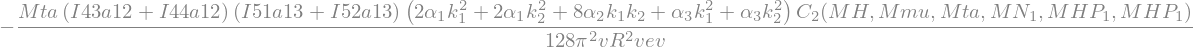

In [246]:
triangle_fss.AL()

In [186]:
print(UFOModel.particles)

[a, Z, W__plus__, W__minus__, g, W2__plus__, W2__minus__, Z2, ghG, ghG__tilde__, e__minus__, e__plus__, mu__minus__, mu__plus__, ta__minus__, ta__plus__, u, u__tilde__, c, c__tilde__, t, t__tilde__, d, d__tilde__, s, s__tilde__, b, b__tilde__, N1, N2, N3, N4, N5, N6, H, H01, H02, H03, G01, G02, GL__plus__, GL__minus__, GR__plus__, GR__minus__, HP1, HM1, HP2, HM2, HL__plus____plus__, HL__minus____minus__, HR__plus____plus__, HR__minus____minus__, A01, A02]


In [244]:
matching_vertices = UFOModel.find_vertices_involving(['HP1', 'ta-', 'N1'])
for vertex in matching_vertices:
    print(vertex.particles)

[N1, ta__minus__, HP1]


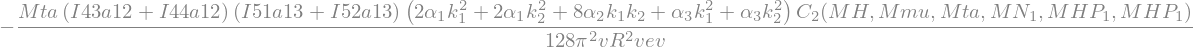

In [152]:
triangleH_HP1_HM1.AR()